In [890]:
import numpy as np
import pandas as pd
import plotly.express as px

In [891]:
df = pd.read_csv("GDP_DATA.csv")

In [892]:
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [893]:
#Checking for any null values present in the data:
df.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

## Calculation of % GDP:

##### for % GDP calculation of current year, I require the GDP data of current year as well as the previous year.
##### Then I can apply the formula given below:

### %GDP or GDP Change = ((GDP of current year - GDP of previous year)/(GDP of previous year))*100

In [896]:
final_data_list = []

for country_name in df["Country Name"].unique():

    df_pr = df[df["Country Name"] == country_name]
    
    gdp_data = df_pr.values
    gdp_change = [0] #since, the data before 1968 (i.e., 1967) is not available, so it is assigned as '0'

    for i in range(1, len(gdp_data)):
        
        prev = gdp_data[i-1][3]
        curr = gdp_data[i][3]
        
        gdp_change.append(round(((curr - prev) / prev)*100,2))

    df_pr = df_pr.assign(GDP_Change = gdp_change)
    final_data_list.append(df_pr)

In [897]:
df = pd.concat(final_data_list, axis = 0)

In [898]:
df

,Country Name,Country Code,Year,Value,GDP_Change
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


#### GDP Growth over the Years for India:

In [900]:
df_pr = df[df["Country Name"] == "India"]

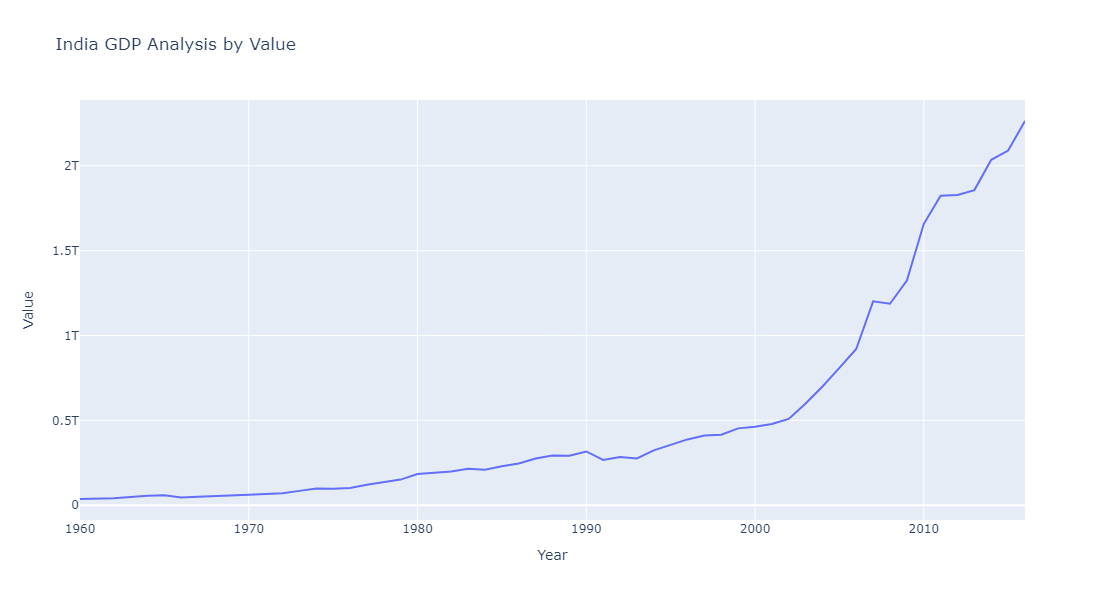

In [901]:
fig_ind = px.line(df_pr, x = 'Year', y = 'Value', title = 'India GDP Analysis by Value', width=1000, height=600)
fig_ind

#### GDP Growth over the Years for Japan:

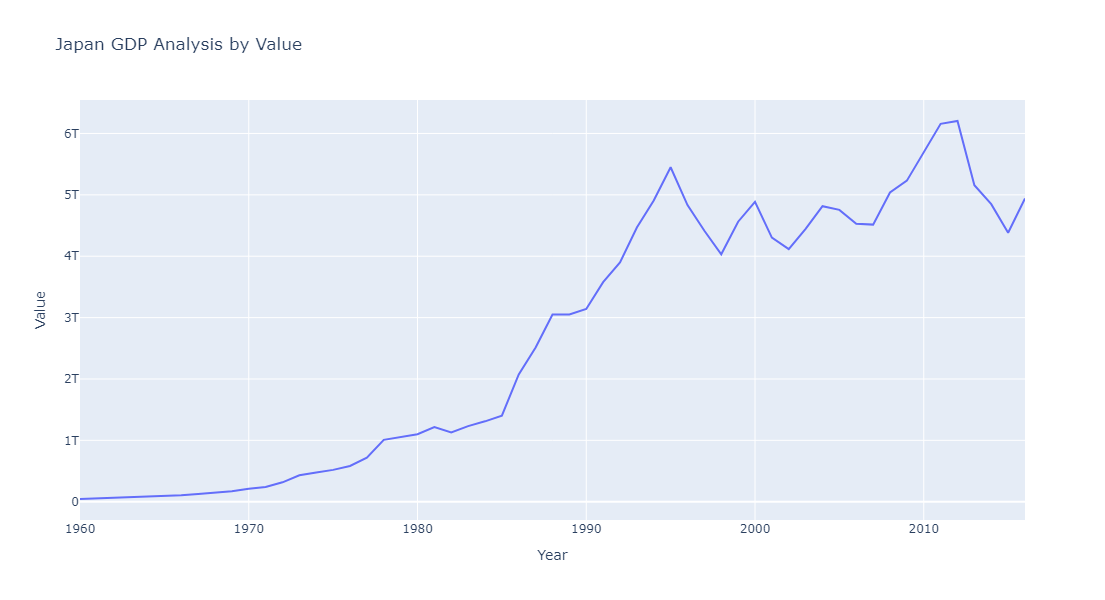

In [903]:
df_pr = df[df["Country Name"] == "Japan"]
fig_jap = px.line(df_pr, x = 'Year', y = 'Value', title = 'Japan GDP Analysis by Value', width=1000, height=600)
fig_jap

#### GDP Growth over the Years for China:

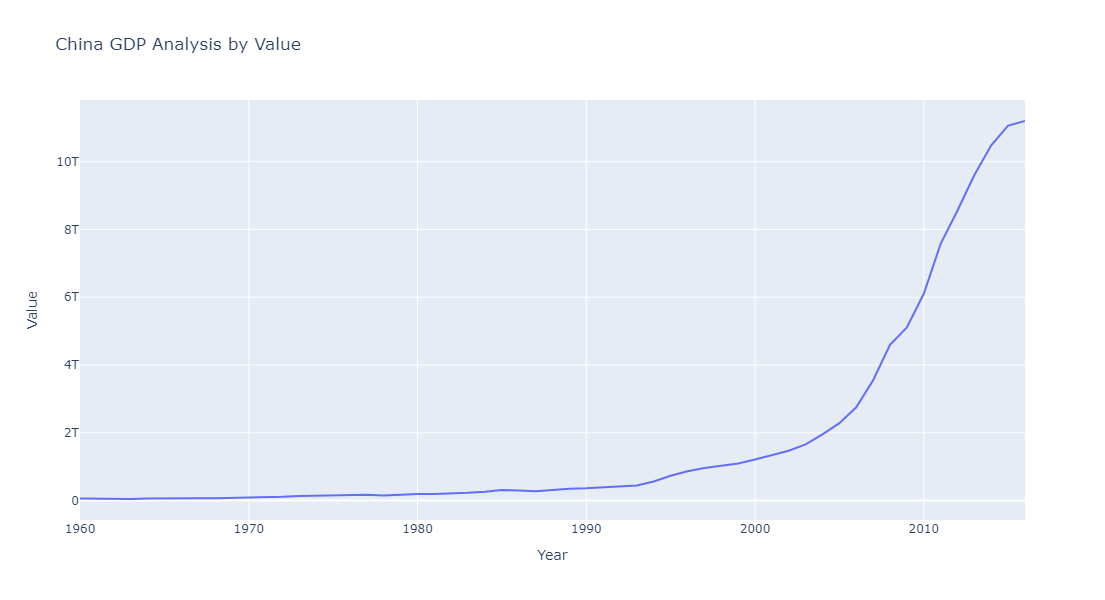

In [905]:
df_pr = df[df["Country Name"] == "China"]
fig_chn = px.line(df_pr, x = 'Year', y = 'Value', title = 'China GDP Analysis by Value', width=1000, height=600)
fig_chn

#### World GDP:

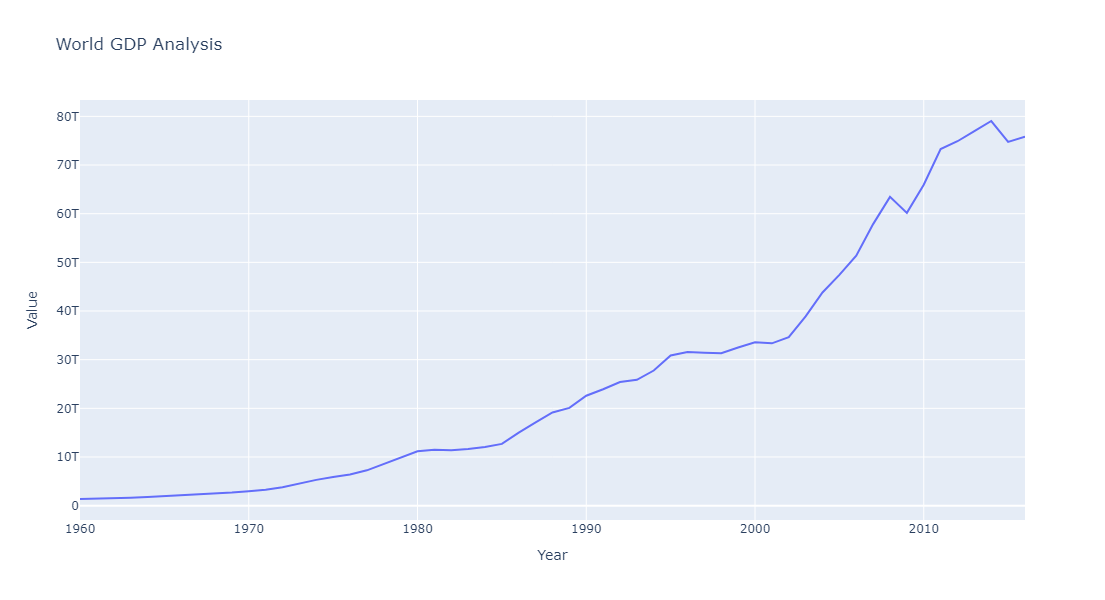

In [907]:
df_pr = df[df["Country Name"] == "World"]
fig_world = px.line(df_pr, x = 'Year', y = 'Value', title = 'World GDP Analysis', width=1000, height=600)
fig_world

# Comparing GDP over the years for different countries:

#### 1. GDP Comparison between Japan and India:

In [910]:
df_country1 = df[df["Country Name"] == "India"]
df_country2 = df[df["Country Name"] == "Japan"]

df_pr = pd.concat([df_country1,df_country2], axis = 0)

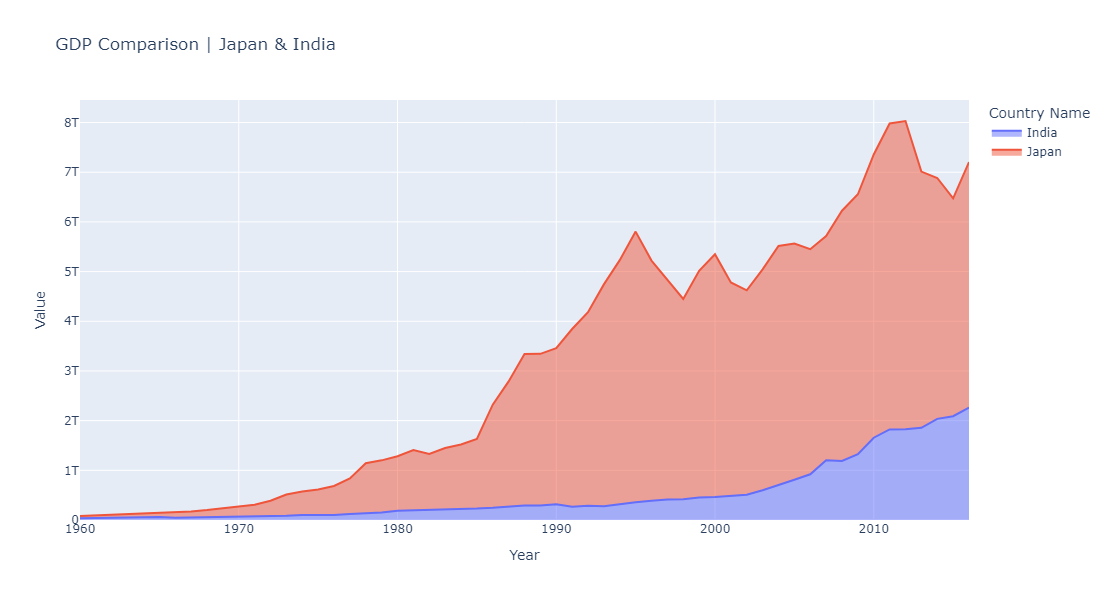

In [911]:
fig_combined = px.area(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison | Japan & India', color = 'Country Name', height = 600, width = 1000)
fig_combined

#### 2. GDP Comparison between China and India:

In [913]:
df_c2 = df[df["Country Name"] == "China"]

df_pr2 = pd.concat([df_country1, df_c2], axis = 0)

In [914]:
fig_china_and_india = px.area(df_pr2, x = 'Year', y = 'Value', color = 'Country Name', height = 600, width = 1000, title = 'GDP Comparison | China & India')

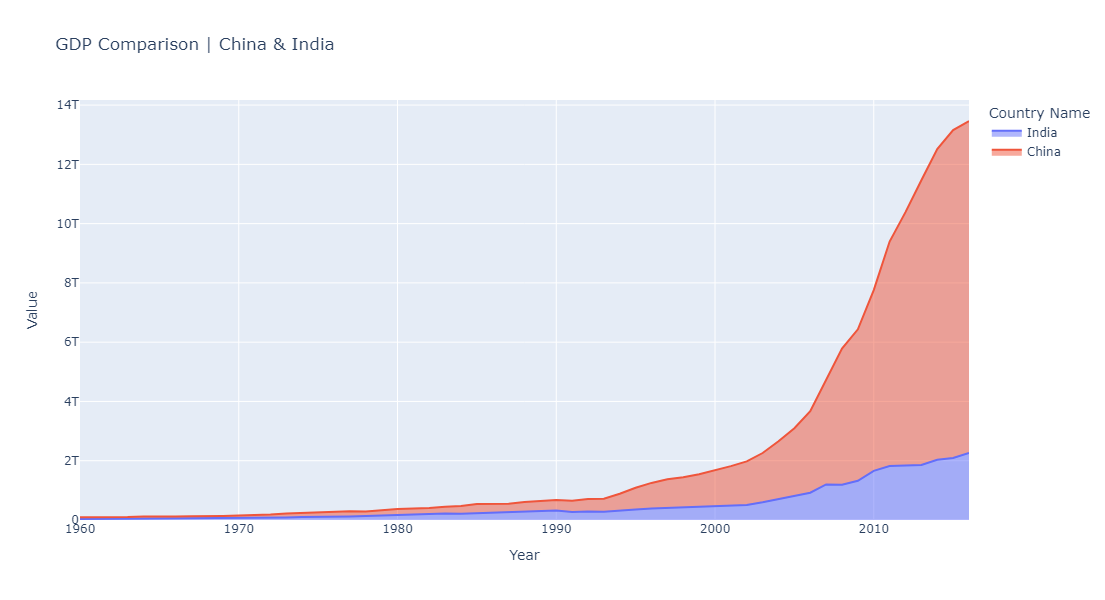

In [915]:
fig_china_and_india

### 3. GDP Comparison by defining a Function and a list:

#### I will create a list of key countries—China, Japan, India, the United States, Germany, and South Korea—and then define a function to plot their GDP graphs all at once.
### This will end up giving us a dynamic visual comparison of these economic giants.

In [918]:
lst = ['IND','JPN','USA','CHN','KOR','DEU']

In [919]:
def compare_by_country_code(lst):
    dataframes = []
    
    for country_code in lst:
        dataframes.append(df[df["Country Code"] == country_code])
    
    df_pr = pd.concat(dataframes, axis = 0)

    fig_for_all_countries_in_list = px.line(df_pr, x = 'Year', y = 'Value', color = "Country Name", height = 600, width = 1000,
                                            title = 'GDP Comparison - IND|JPN|USA|CHN|KOR|DEU')
    fig_for_all_countries_in_list.show()

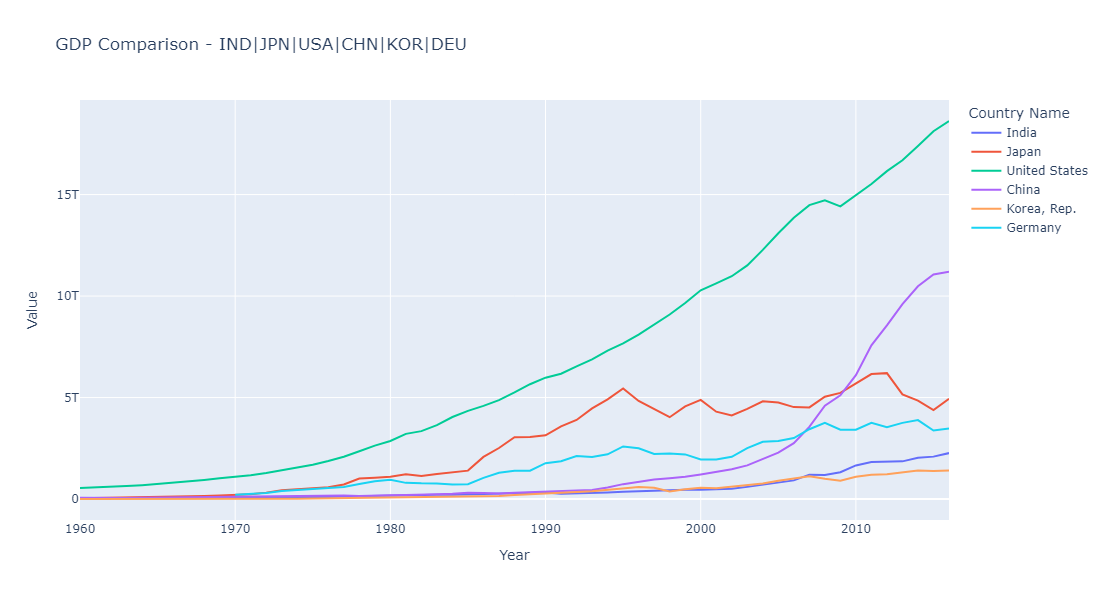

In [920]:
compare_by_country_code(lst)

### 4. GDP Growth Comparison for 6 countries: China, Japan, India, the United States, Germany, 
### and South Korea

In [922]:
def compare_by_country_code(lst):
    dataframes = []
    
    for country_code in lst:
        dataframes.append(df[df["Country Code"] == country_code])
    
    df_pr = pd.concat(dataframes, axis = 0)

    fig_for_all_countries_in_list = px.line(df_pr, x = 'Year', y = 'GDP_Change', color = "Country Name", height = 600, width = 1000,
                                            title = 'GDP Growth Comparison - IND|JPN|USA|CHN|KOR|DEU')
    fig_for_all_countries_in_list.show()

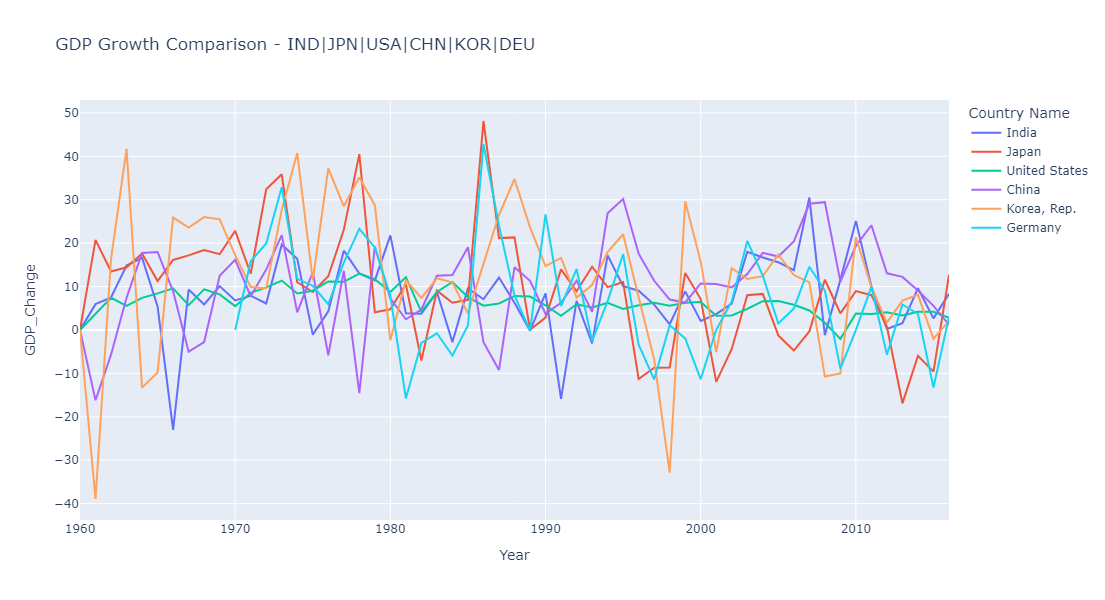

In [923]:
compare_by_country_code(lst)

# GDP of each country With Respect to the World GDP (80 Trillion Dollars)

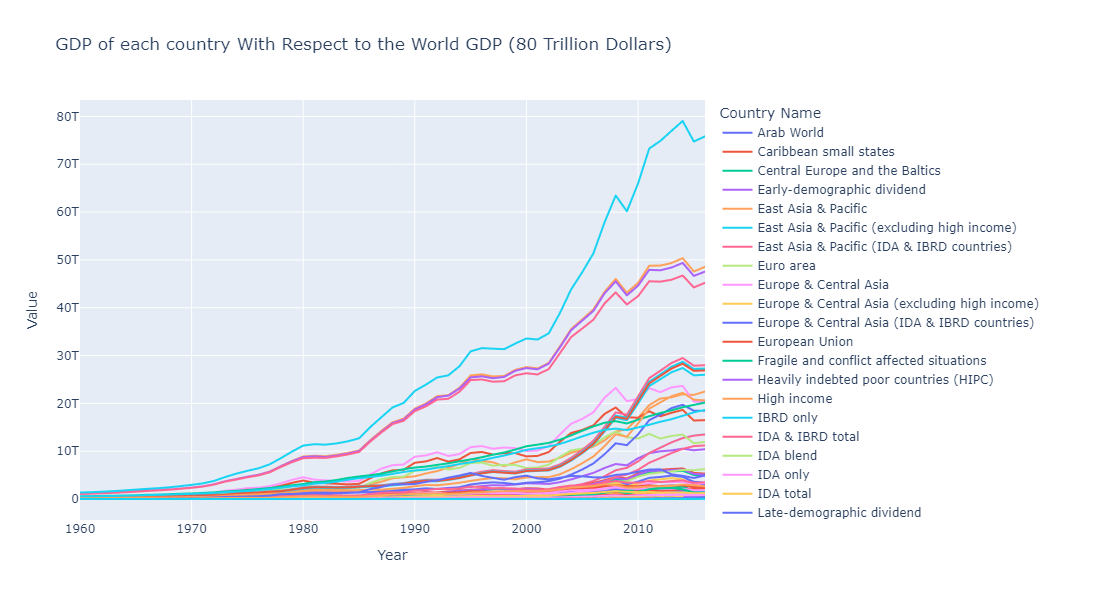

In [925]:
full_fig = px.line(df, x = 'Year', y = 'Value', 
                   title = 'GDP of each country With Respect to the World GDP (80 Trillion Dollars)',
                   color = 'Country Name', height = 600, width = 1200)
full_fig

# GDP Growth Comparison of all the countries:

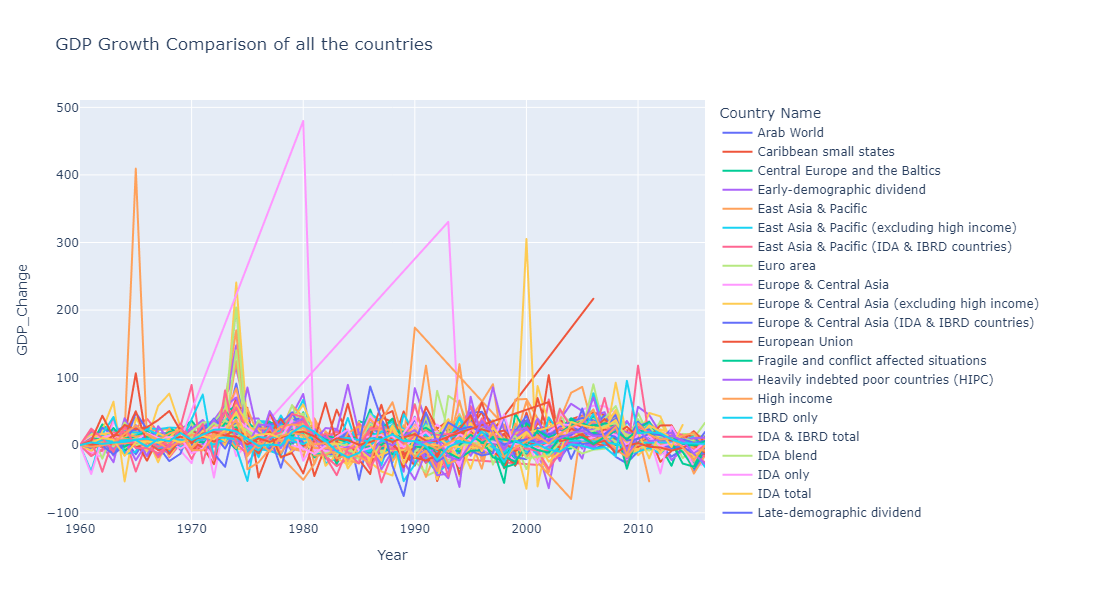

In [927]:
full_fig = px.line(df, x = 'Year', y = 'GDP_Change', 
                   title = 'GDP Growth Comparison of all the countries',
                   color = 'Country Name', height = 600, width = 1200)
full_fig

##### Critical data summary from "GDP Growth Comparison of all the countries" plot:
##### Significant Outliers exists for countries namely Equatorial Guinea, Switzerland, Cambodia, Iraq, Congo and Cayman Islands

### To remove the outliers above, I have to consider only those countries which are having 
   ### (2016 - 1960 = 57) years of GDP data

# GDP Growth Comparison for 1960 to 2016:

In [931]:
dfs = []

for country_name in df["Country Name"].unique():
    df_pr = df[df["Country Name"] == country_name]
    if(len(df_pr) == 57):
        dfs.append(df_pr)

df_pr = pd.concat(dfs, axis = 0)

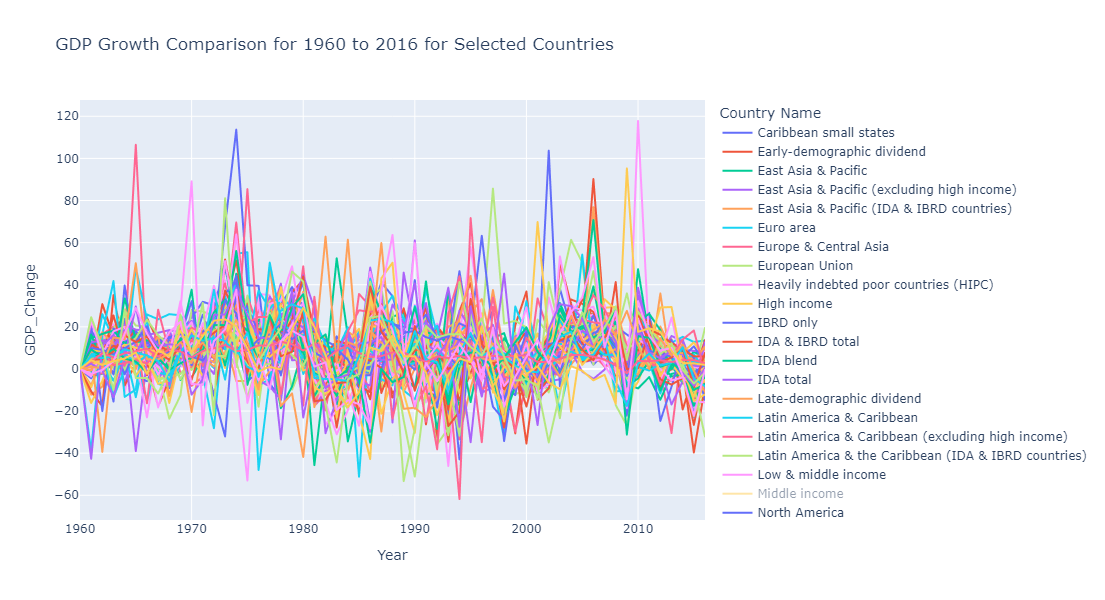

In [932]:
full_fig_2 = px.line(df_pr, x = 'Year', y = 'GDP_Change', 
                   title = 'GDP Growth Comparison for 1960 to 2016 for Selected Countries',
                   color = 'Country Name', height = 600, width = 1200)
full_fig_2